# Modelo logistico

## Librerias

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from xml.dom import minidom
from datetime import datetime
instanteInicial = datetime.now()

## Cargar datos

In [27]:
url = 'covid.csv'
df = pd.read_csv(url)
df = df.fillna(0)
df

,muestras,muestras_pcr,muestras_pcr_nuevas,pruebas_rezagadas,muertes_confirmadas,muertes_probables,muertes,muertes_nuevas,positivas,positivas_pcr,...,defunciones_2017,defunciones_2017_nuevas,defunciones_2016,defunciones_2016_nuevas,defunciones_2015,defunciones_2015_nuevas,hospitalizadas_altas,hospitalizadas_estables,hospitalizadas_pronostico_reservadas,created_at
0,129,129,0,106,1,0,1,0,23,23,...,14506,217,13643,212,12866,167,0,0,1,13/03/2020
1,206,206,77,178,2,0,2,1,28,28,...,14718,212,13848,205,13047,181,0,7,3,14/03/2020
2,273,273,67,236,2,0,2,0,37,37,...,14926,208,14048,200,13228,181,0,7,2,15/03/2020
3,354,354,81,296,2,0,2,0,58,58,...,15164,238,14238,190,13388,160,0,9,5,16/03/2020
4,762,762,408,651,2,0,2,0,111,111,...,15347,183,14412,174,13550,162,0,9,5,17/03/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,562074,541502,3709,53605,8321,4311,12632,10,176103,167147,...,58331,215,56492,182,54286,144,21260,498,355,30/10/2020
232,567080,546508,5006,53176,8357,4313,12670,38,177148,168192,...,58503,172,56653,161,54471,185,21349,520,348,31/10/2020
233,569362,548790,2282,51707,8371,4313,12684,14,178150,169194,...,58668,165,56836,183,54618,147,21423,531,342,01/11/2020
234,569798,549226,436,50815,8380,4312,12692,8,178518,169562,...,58844,176,57009,173,54777,159,21476,520,342,02/11/2020


## Modelo de orden

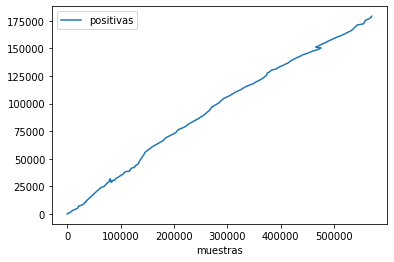

In [33]:
df = df.loc[:,['muestras','positivas']]
FMT = '%Y-%m-%d'
#date = df['muestras']
df
df.plot(x ='muestras', y='positivas')

## Modelo lineal

In [24]:
x = list(df.iloc [:, 0])
y = list(df.iloc [:, 1])
regr = linear_model.LinearRegression()

regr.fit(np.array(x).reshape(-1, 1) ,y)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)

Coefficients: 
 [0.31872296]
Independent term: 
 4093.072591469696


In [35]:
y_prediccion = regr.predict([[100]])
print(int(y_prediccion))

4124


Predicción a 7 días sumando desde el ultimo día en x(30): 4104.865341020039 contagiados


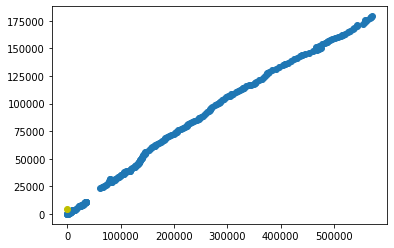

In [39]:
plt.scatter(x, y)
x_real = np.array(range(0,100))
puntos=regr.predict(x_real.reshape(-1, 1))
plt.plot(x_real,puntos, color='red')
plt.plot(37,puntos[37],'oy')
print ('Predicción a 7 días sumando desde el ultimo día en x(30):', puntos[37], 'contagiados')
plt.show()

#### Modelo logistico

In [40]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y)
print(exp_fit)


(array([-244702.08796256,   27326.51286535]), array([[ 2.43827803e+08, -2.05065445e+07],
       [-2.05065445e+07,  1.75679864e+06]]))


Predicción a 7 días sumando desde el ultimo día en x(30): -145299.54296997195 contagiados


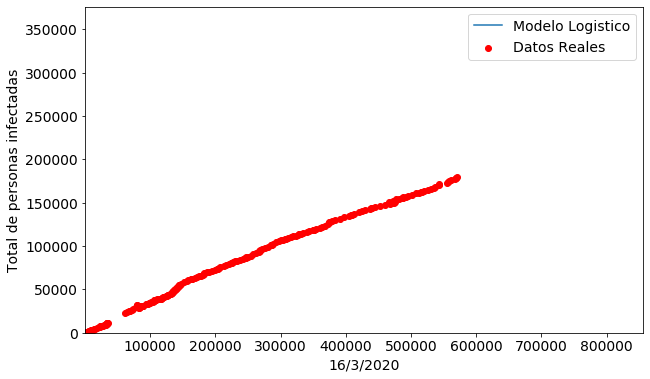

In [41]:
pred_x = list(range(1,100))
plt.rcParams['figure.figsize'] = [10, 6]
plt.rc('font', size=14)
pdb.set_trace()
plt.scatter(x,y,label="Datos Reales",color="red")
puntos=[modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
plt.plot(pred_x,puntos , label="Modelo Logistico" )
plt.legend()
plt.xlabel("16/3/2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((0,max(y)*2.1))
plt.xlim((min(x),max(x)*1.5))
plt.plot(37,puntos[37],'oy')
print ('Predicción a 7 días sumando desde el ultimo día en x(30):', puntos[37], 'contagiados')
plt.show()

#### Conclusiones:

Los modelos matematicos nos  ayudan a predecir el numero de infectados que se tendran en los proximos dias para estar preparados